TASK-3

SALES PREDICTION USING PYTHON

IMPORT ALL REQUIRED LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score


LOAD THE DATA SET INTO THE PANDAS LIBRARY

In [7]:
sales = pd.read_csv('advertising.xls', encoding='latin-1')

In [8]:
sales.shape

(200, 4)

In [9]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

VISUALIZING THE DATA

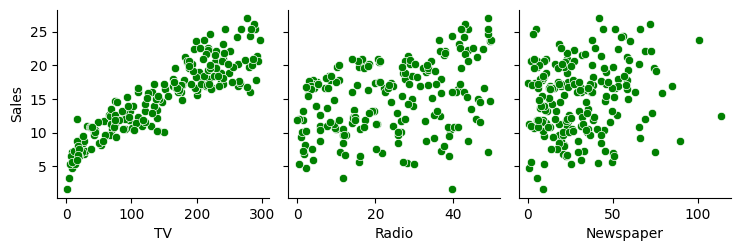

In [12]:
sns.pairplot(sales, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], kind='scatter', plot_kws={'color':'green'})
plt.show()


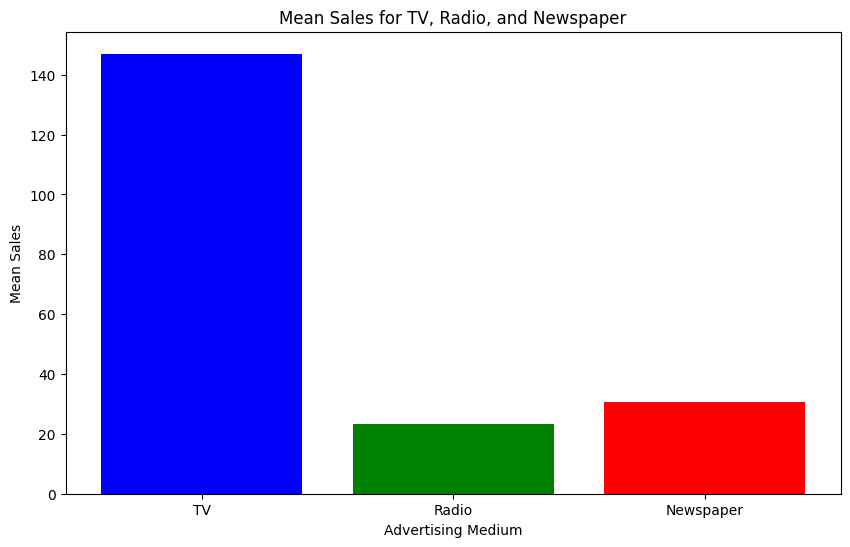

In [13]:

x_columns = ["TV", "Radio", "Newspaper"]
y_column = "Sales"
mean_values = sales[x_columns].mean()
plt.figure(figsize=(10, 6))
plt.bar(x_columns, mean_values, color=['blue', 'green', 'red'])
plt.title('Mean Sales for TV, Radio, and Newspaper')
plt.xlabel('Advertising Medium')
plt.ylabel('Mean Sales')
plt.show()


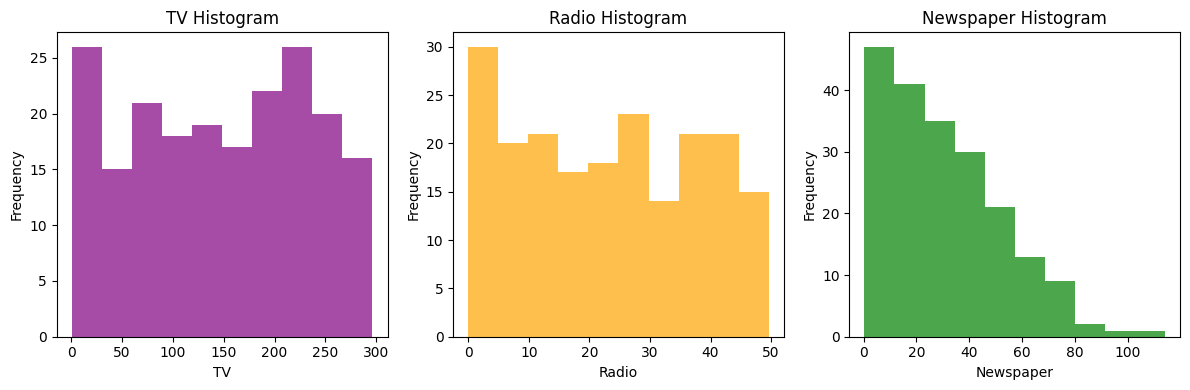

In [14]:

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(sales['TV'], color='purple', alpha=0.7)
plt.title('TV Histogram')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.subplot(132)
plt.hist(sales['Radio'], color='orange', alpha=0.7)
plt.title('Radio Histogram')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.subplot(133)
plt.hist(sales['Newspaper'], color='green', alpha=0.7)
plt.title('Newspaper Histogram')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


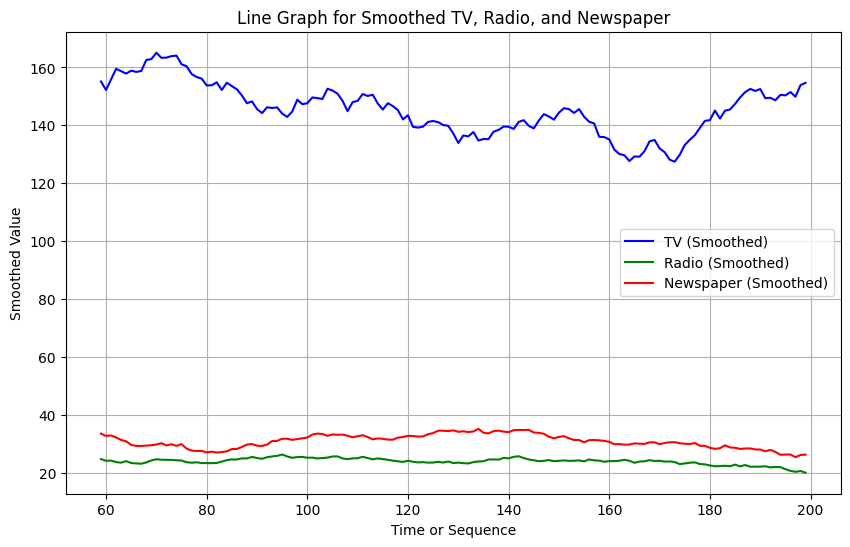

In [15]:

window_size = 60
smoothed_tv = sales['TV'].rolling(window=window_size).mean()
smoothed_radio = sales['Radio'].rolling(window=window_size).mean()
smoothed_newspaper = sales['Newspaper'].rolling(window=window_size).mean()
plt.figure(figsize=(10, 6))

plt.plot(smoothed_tv, label='TV (Smoothed)', color='blue')
plt.plot(smoothed_radio, label='Radio (Smoothed)', color='green')
plt.plot(smoothed_newspaper, label='Newspaper (Smoothed)', color='red')

plt.title('Line Graph for Smoothed TV, Radio, and Newspaper')
plt.xlabel('Time or Sequence')
plt.ylabel('Smoothed Value')
plt.legend()
plt.grid(True)
plt.show()


MODEL TRAINING

Mean Squared Error: 5.49
R-squared: 0.81


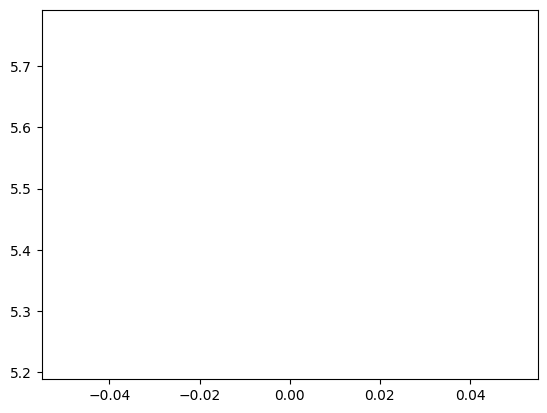

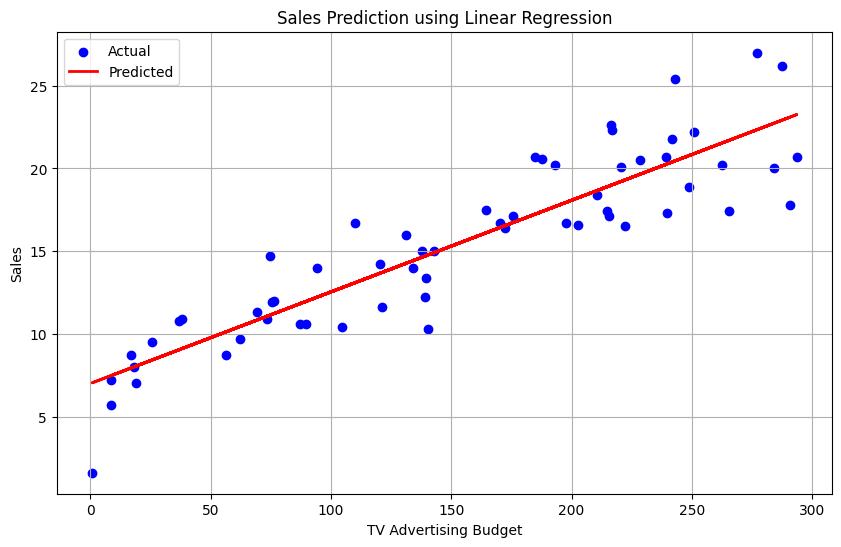

In [21]:
X = sales[['TV']]
y = sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
from sklearn.linear_model import LinearRegression

#model = LinearRegression()

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")
plt.plot(mse)

plt.figure(figsize=(10, 6))


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Sales Prediction using Linear Regression')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

